In [17]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

In [18]:
data=pd.read_csv('/content/StockPrice.zip')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0
...,...,...,...,...,...,...,...
257,2021-01-20,73.192001,73.192299,72.899300,73.191902,73.191902,0
258,2021-01-21,72.907898,73.045303,72.883003,72.910896,72.910896,0
259,2021-01-22,72.954903,73.237503,72.929001,72.954903,72.954903,0
260,2021-01-25,72.995903,73.220001,72.877998,72.995903,72.995903,0


In [19]:
data.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
257,False,False,False,False,False,False,False
258,False,False,False,False,False,False,False
259,False,False,False,False,False,False,False
260,False,False,False,False,False,False,False


In [20]:
zero_columns=data.columns[data.eq(0).all()]
data=data.drop(zero_columns,axis=1)
data

,Date,Open,High,Low,Close,Adj Close
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999
...,...,...,...,...,...,...
257,2021-01-20,73.192001,73.192299,72.899300,73.191902,73.191902
258,2021-01-21,72.907898,73.045303,72.883003,72.910896,72.910896
259,2021-01-22,72.954903,73.237503,72.929001,72.954903,72.954903
260,2021-01-25,72.995903,73.220001,72.877998,72.995903,72.995903


<Axes: >

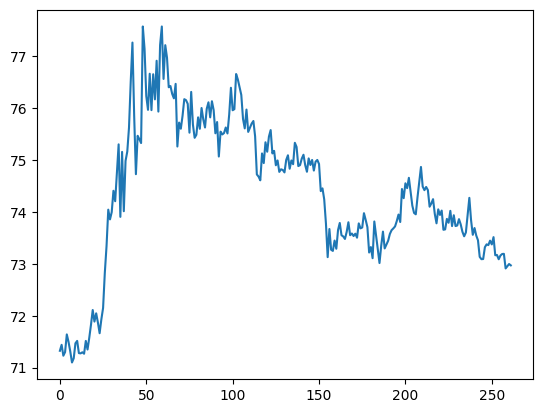

In [21]:
data['Close'].plot()

In [22]:
train_data=data.iloc[:int(.80*len(data)),:]
test_data=data.iloc[int(.80*len(data)):,:]

In [12]:
features=['Open','High','Adj Close','Low']
target='Close'

In [23]:
model=xgb.XGBRegressor()
model.fit(train_data[features],train_data[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [24]:
predictions=model.predict(test_data[features])
print('Model Predictions')
print(predictions)

Model Predictions
[74.90657  74.56044  74.56044  74.56176  74.45006  74.13808  74.12098
 74.21575  73.94098  73.78517  74.02945  73.94098  74.01266  73.66285
 73.64764  73.85286  73.8327   73.992714 73.67501  73.945984 73.695984
 73.694    73.86259  73.84545  73.62683  73.47442  73.55696  73.94098
 74.0987   73.84386  73.51098  73.67529  73.50653  73.434586 73.04011
 73.043884 73.135216 73.203415 73.24227  73.30624  73.45294  73.4375
 73.48022  73.19553  73.042534 73.04011  73.13581  73.151474 73.043045
 73.04868  73.033424 73.04868  73.12853 ]


In [25]:
print('Actual Values:')
print(test_data[target])


Actual Values:
209    74.864998
210    74.487701
211    74.418098
212    74.479698
213    74.419998
214    74.099602
215    74.162399
216    74.244904
217    73.960800
218    73.779900
219    74.048798
220    73.940903
221    74.025200
222    73.654999
223    73.662598
224    73.864899
225    73.790298
226    74.019997
227    73.726402
228    73.934998
229    73.726700
230    73.737999
231    73.860001
232    73.759804
233    73.616600
234    73.529800
235    73.603600
236    73.935303
237    74.269997
238    73.839798
239    73.557800
240    73.689003
241    73.544899
242    73.453598
243    73.134003
244    73.089203
245    73.092003
246    73.320000
247    73.374802
248    73.360001
249    73.445999
250    73.373398
251    73.513496
252    73.165001
253    73.169899
254    73.087601
255    73.158997
256    73.188698
257    73.191902
258    72.910896
259    72.954903
260    72.995903
261    72.970001
Name: Close, dtype: float64


In [26]:
accuracy=model.score(test_data[features],test_data[target])
print('Accuracy:')
print(accuracy)

Accuracy:
0.9777825659012613


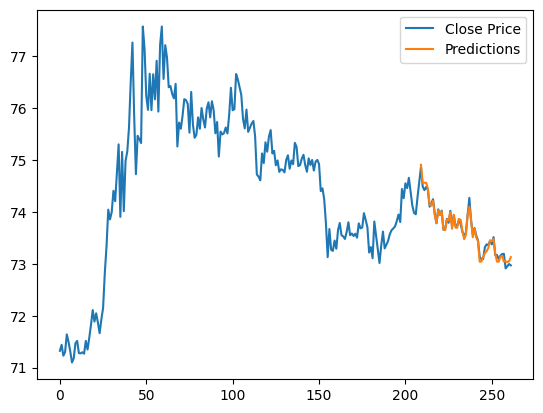

In [ ]:
plt.plot(data['Close'],label='Close Price')
plt.plot(test_data[target].index,predictions,label='Predictions')
plt.legend()
plt.show()